In [654]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [655]:
data=pd.read_csv('Mall_Customers.csv')

In [656]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [657]:
len(data)

200

In [658]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [659]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

In [660]:
data_lables=encoder.fit_transform(data[['Gender']])

In [661]:
data_lables.toarray()

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [662]:
encoded_df = pd.DataFrame(data_lables.toarray(), columns=encoder.get_feature_names_out(['Gender']))

In [663]:
encoded_df

,Gender_Female,Gender_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
195,1.0,0.0
196,1.0,0.0
197,0.0,1.0
198,0.0,1.0


In [664]:
data=pd.concat([data,encoded_df],axis=1)

In [665]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,Male,19,15,39,0.0,1.0
1,2,Male,21,15,81,0.0,1.0
2,3,Female,20,16,6,1.0,0.0
3,4,Female,23,16,77,1.0,0.0
4,5,Female,31,17,40,1.0,0.0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1.0,0.0
196,197,Female,45,126,28,1.0,0.0
197,198,Male,32,126,74,0.0,1.0
198,199,Male,32,137,18,0.0,1.0


In [666]:
data.drop(columns=['Gender'],inplace=True)

In [667]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0.0,1.0
1,2,21,15,81,0.0,1.0
2,3,20,16,6,1.0,0.0
3,4,23,16,77,1.0,0.0
4,5,31,17,40,1.0,0.0


In [668]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0.0,1.0
1,2,21,15,81,0.0,1.0
2,3,20,16,6,1.0,0.0
3,4,23,16,77,1.0,0.0
4,5,31,17,40,1.0,0.0


<Axes: ylabel='Annual Income (k$)'>

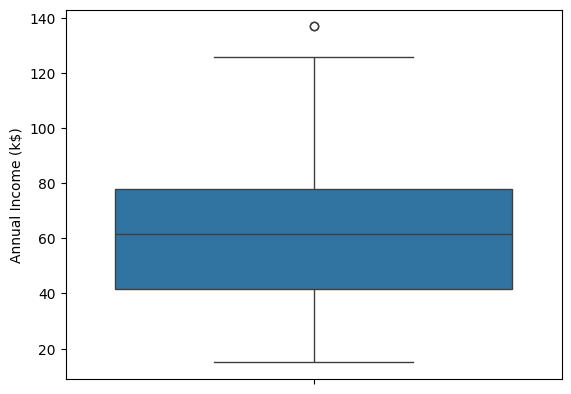

In [669]:
sns.boxplot(data['Annual Income (k$)'])

In [670]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        def range_(value):
            if (value > upper_limit):
                return upper_limit
            elif (value < lower_limit):
                return lower_limit
            else:
                return value

        df[col]=df[col].apply(range_)

    return df

In [671]:
data.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [672]:
columns_=['Annual Income (k$)','Spending Score (1-100)']
remove_outliers(data,columns_)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15.00,39,0.0,1.0
1,2,21,15.00,81,0.0,1.0
2,3,20,16.00,6,1.0,0.0
3,4,23,16.00,77,1.0,0.0
4,5,31,17.00,40,1.0,0.0
...,...,...,...,...,...,...
195,196,35,120.00,79,1.0,0.0
196,197,45,126.00,28,1.0,0.0
197,198,32,126.00,74,0.0,1.0
198,199,32,132.75,18,0.0,1.0


<Axes: ylabel='Annual Income (k$)'>

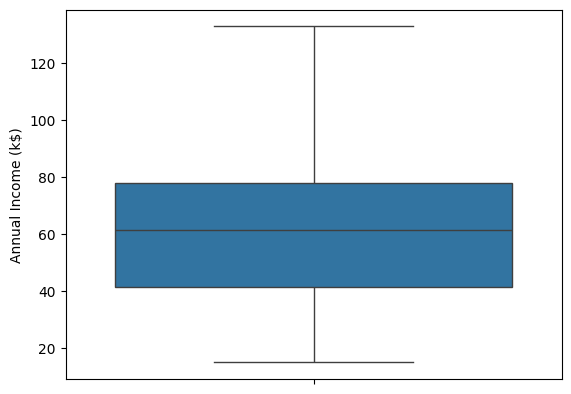

In [673]:
sns.boxplot(data['Annual Income (k$)'])

<Axes: ylabel='Spending Score (1-100)'>

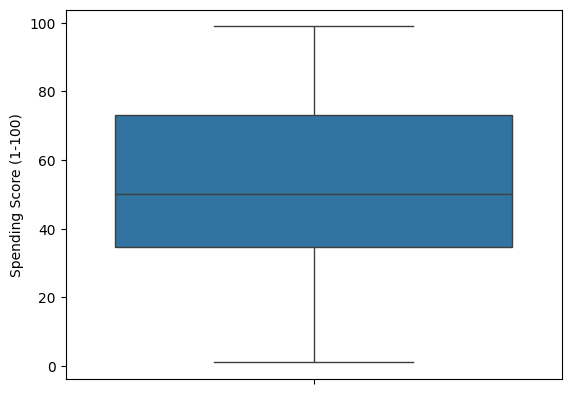

In [674]:
sns.boxplot(data['Spending Score (1-100)'])

In [675]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [676]:
data.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [677]:
data['Annual Income (k$)']

0       15.00
1       15.00
2       16.00
3       16.00
4       17.00
        ...  
195    120.00
196    126.00
197    126.00
198    132.75
199    132.75
Name: Annual Income (k$), Length: 200, dtype: float64

In [678]:
type(data['Annual Income (k$)'])

pandas.core.series.Series

In [679]:
# np.array(data['Annual Income (k$)'])

In [680]:
# data['Annual Income (k$)']=scalar.fit_transform(np.array(data['Annual Income (k$)']).reshape(-1,1))

In [681]:
# data['Annual Income (k$)']

In [682]:
data.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

From Here We Should Move With Only Two features that is annule income and the spending

In [683]:
data.drop(columns=['CustomerID','Age','Gender_Female','Gender_Male'],inplace=True)

In [684]:
data.sample(10)

,Annual Income (k$),Spending Score (1-100)
112,64.0,42
35,33.0,81
23,25.0,73
196,126.0,28
96,60.0,47
105,62.0,42
165,85.0,75
10,19.0,14
167,86.0,95
86,57.0,58


In [685]:
# data=scalar.fit_transform(data)

In [686]:
type(data)

pandas.core.frame.DataFrame

In [687]:
data=data.values

In [688]:
type(data)

numpy.ndarray

In [689]:
from sklearn.cluster import KMeans

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kme

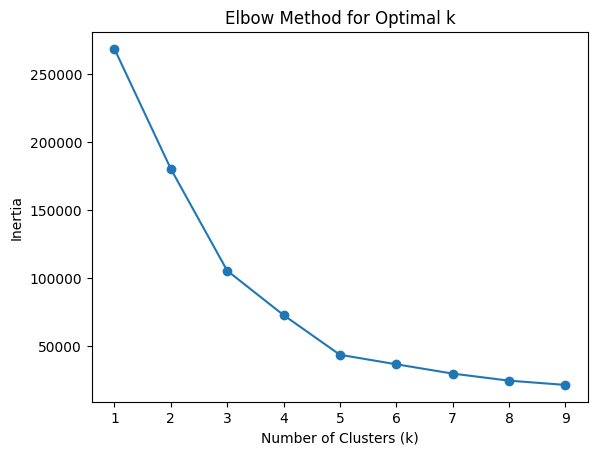

In [690]:
inertia_values = []
possible_k_values = range(1, 10)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++' ,random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(possible_k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [700]:
model=KMeans(n_clusters=5,init='k-means++',random_state=1)
predict=model.fit_predict(data)


c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


'Annual Income (k$)', 'Spending Score (1-100)',

In [701]:
predict

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

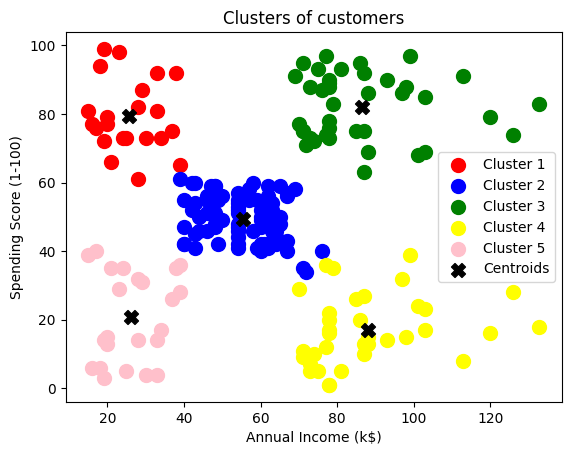

In [703]:


plt.scatter(data[predict == 0, 0], data[predict == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data[predict == 1, 0], data[predict == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data[predict == 2, 0], data[predict == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data[predict == 3, 0], data[predict == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(data[predict == 4, 0], data[predict == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'Black', label = 'Centroids',marker='X')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

This is how we have classified the customers into the different category based on their income and the spending so we can make our Future plans for the different category peoples 